In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plot_config import set_plot_config
from adjustText import adjust_text
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

set_plot_config()

In [2]:
from land_cover import LandCoverPlotter, IGBP_cmap
landcover_plotter = LandCoverPlotter("sample_data/MCD12Q1.A2022001.", 
                                     'ne_10m_populated_places/ne_10m_populated_places.shp')

In [3]:
old2new = {"Xian": "Xi\'an", "Buizhou": "Binzhou"}
landcover_plotter.fix_name(old2new)

In [4]:
include_cities = ["Beijing", "Shanghai", "Tokyo", "Seoul"]
points = np.vstack([landcover_plotter.city_locator(city_name) for city_name in include_cities])

offset = 1.0
lon_min, lon_max = np.min(points[:, 0]) - offset, np.max(points[:, 0]) + offset
lat_min, lat_max = np.min(points[:, 1]) - offset, np.max(points[:, 1]) + offset

In [5]:
n = 1200
lons = np.linspace(lon_min, lon_max, n)
lats = np.linspace(lat_min, lat_max, n)
lons, lats = np.meshgrid(lons, lats)
lons, lats = lons.flatten(), lats.flatten()

In [6]:
landcover = landcover_plotter.latlon2landcover(lons, lats).reshape(n, n)

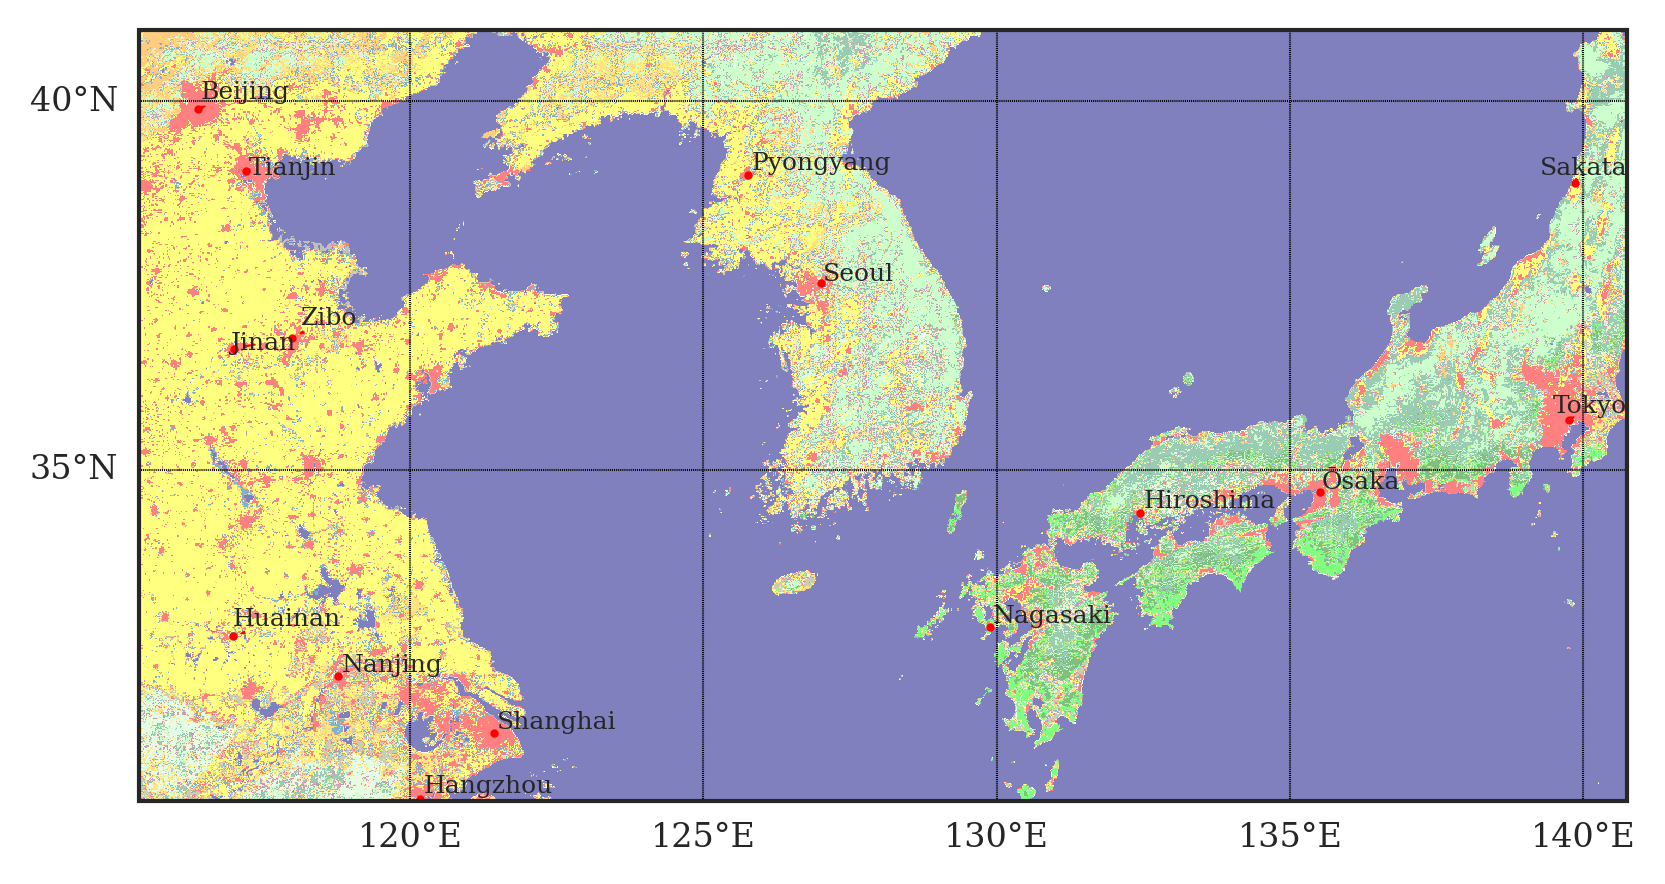

In [7]:
projection = ccrs.Mercator()
fig, ax = plt.subplots(subplot_kw={'projection': projection})
ax.set_extent([lon_min, lon_max, 
               lat_min, lat_max],
              crs=landcover_plotter.plate_carree_projection)
ax.imshow(landcover, origin="lower", extent=(lon_min, lon_max, lat_min, lat_max),
        cmap=IGBP_cmap, alpha = 0.5,
        transform=landcover_plotter.plate_carree_projection)

landcover_plotter.show_n_largest_city(ax, lon_min, lon_max, lat_min, lat_max, 15)

gl = landcover_plotter.show_lat_lon(ax, 5, 5)

fig.savefig("img/merc.png", bbox_inches="tight")

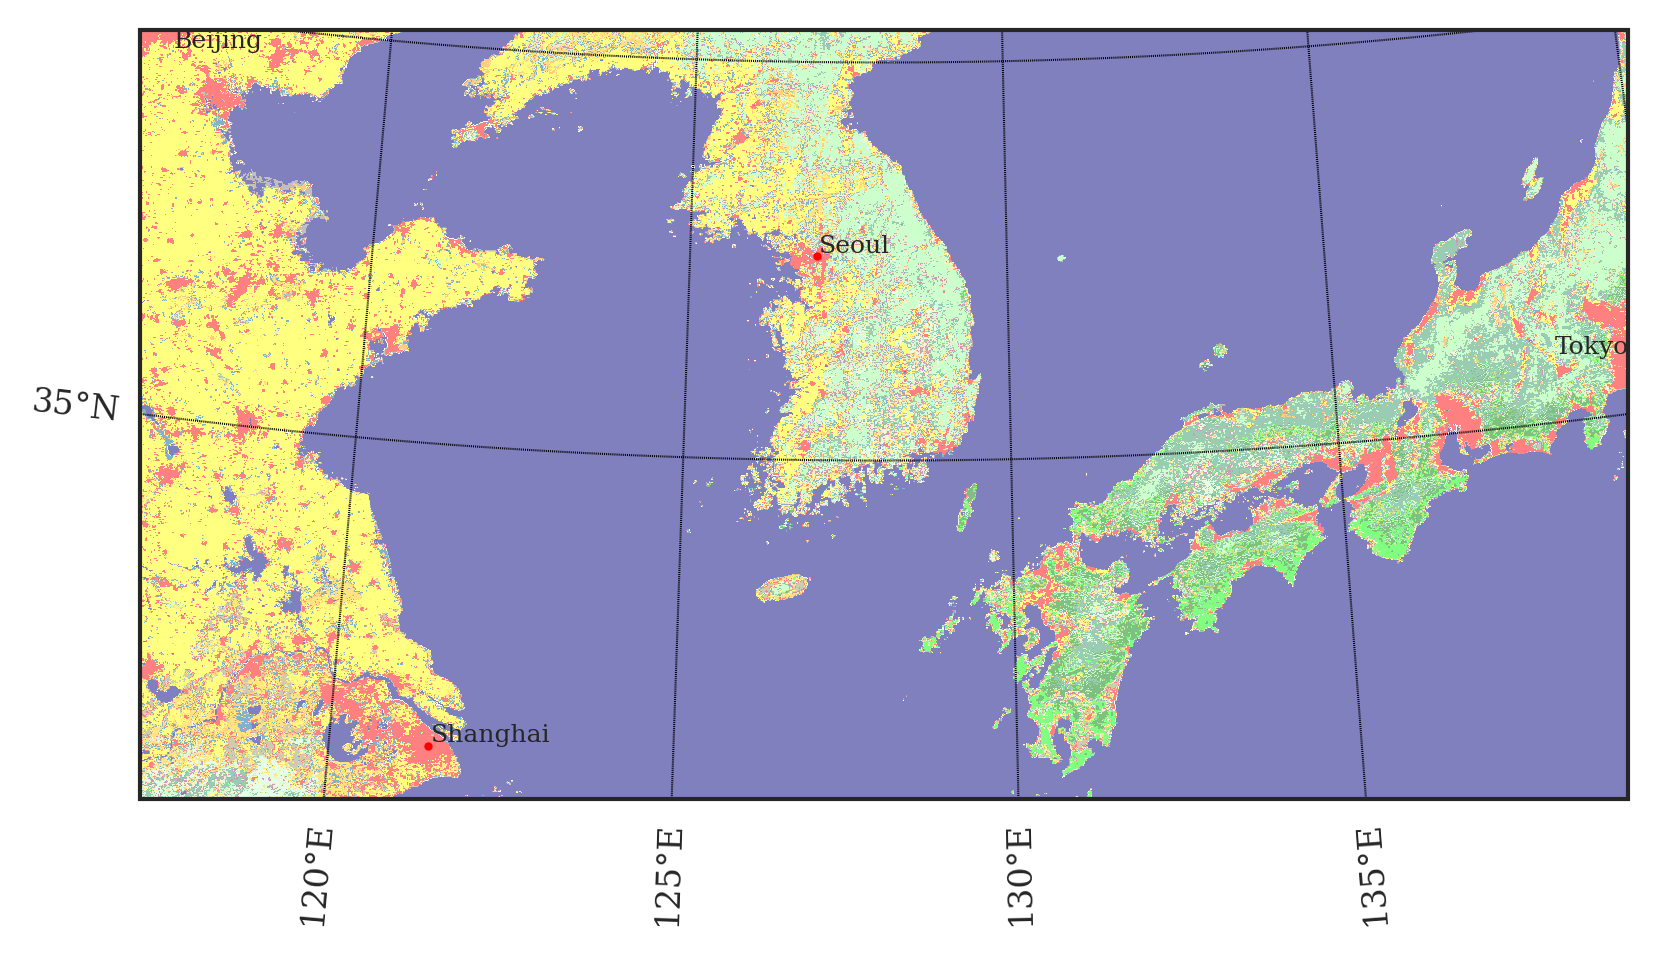

In [8]:
projection = ccrs.LambertConformal(central_longitude=(lon_min + lon_max) / 2,
                                   central_latitude=(lat_min + lat_max) / 2)
fig, ax = plt.subplots(subplot_kw={'projection': projection})

ax.set_extent([lon_min + offset * 2, lon_max-offset * 2, 
               lat_min, lat_max-offset],
              crs=landcover_plotter.plate_carree_projection)
ax.imshow(landcover, origin="lower", extent=(lon_min, lon_max, lat_min, lat_max),
        cmap=IGBP_cmap, alpha = 0.5,
        transform=landcover_plotter.plate_carree_projection)

landcover_plotter.show_cities(ax, include_cities, lon_min, lon_max, lat_min, lat_max)

gl = landcover_plotter.show_lat_lon(ax, 5, 5)

fig.savefig("img/lambert.png", bbox_inches="tight")